$\textbf{Description de la base}$

L'ensemble de données HMEQ rapporte les caractéristiques et les informations sur les impayés pour 5960 prêts sur valeur domiciliaire. Un prêt sur valeur domiciliaire est un prêt dans lequel le débiteur utilise la valeur nette de son logement comme garantie sous-jacente. 

L'ensemble de données présente les caractéristiques suivantes :

•	$\textbf{BAD}$ :
	
    1 = demandeur en défaut de paiement ou gravement en souffrance ; 
    
	0 = prêt payé par le demandeur

•	$\textbf{LOAN}$ (Numérique) : Montant de la demande de prêt

•	$\textbf{MORTDUE}$ (Numérique) : Montant dû sur l'hypothèque existante

•	$\textbf{VALUE}$ (Numérique) : Valeur de la propriété actuelle

•	$\textbf{REASON}$ :

	DebtCon = consolidation de la dette
    
    HomeImp = amélioration de l'habitat
    
•	$\textbf{JOB}$ : Catégories professionnelles

•	$\textbf{YOJ}$ : Nombres d’années dans l'emploi actuel

•	$\textbf{DEROG}$ : Nombre de signalements dérogatoires majeurs

•	$\textbf{DELINQ}$ : Nombre de lignes de crédit en souffrance

•	$\textbf{CLAGE}$ : Âge de la ligne de crédit la plus ancienne en mois

•	$\textbf{NINQ}$ : Nombre de demandes de crédit récentes

•	$\textbf{CLNO}$ : Nombre de lignes de crédit

•	$\textbf{DEBTINC}$ : Ratio dette/revenu



# Importation des librairies

In [1]:
# -*-coding:Latin-1 -*
def clearall():
    all = [var for var in globals() if var[0] != "_"]
    for var in all:
        del globals()[var]

clearall()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import des données

In [3]:
data_hmeq=pd.read_csv('hmeq.csv')
data_hmeq.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### Renommer les variables

In [4]:
hmeq=data_hmeq.copy()
hmeq=hmeq.rename(columns={
    'BAD': 'reponse',
    'LOAN' : 'montant_pret',
    'MORTDUE': 'hypo',
    'VALUE' : 'valeur_prop',
    'REASON':'but',
    'JOB' :'emploi',
    'YOJ' : 'annee_emploi',
    'DEROG':'signal',
    'DELINQ' :'cred_souffre',
    'CLAGE' : 'age_cred',
    'NINQ' :'nbre_demande',
    'CLNO': 'nbre_credit',
    'DEBTINC' : 'dette_rev'
})

In [5]:
hmeq.head(5)

,reponse,montant_pret,hypo,valeur_prop,but,emploi,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,nbre_credit,dette_rev
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# Détection des données manquantes

In [6]:
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reponse       5960 non-null   int64  
 1   montant_pret  5960 non-null   int64  
 2   hypo          5442 non-null   float64
 3   valeur_prop   5848 non-null   float64
 4   but           5708 non-null   object 
 5   emploi        5681 non-null   object 
 6   annee_emploi  5445 non-null   float64
 7   signal        5252 non-null   float64
 8   cred_souffre  5380 non-null   float64
 9   age_cred      5652 non-null   float64
 10  nbre_demande  5450 non-null   float64
 11  nbre_credit   5738 non-null   float64
 12  dette_rev     4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


### Proportion de données manquantes

In [7]:
mis_data=hmeq.isnull().sum()
mis_data

reponse            0
montant_pret       0
hypo             518
valeur_prop      112
but              252
emploi           279
annee_emploi     515
signal           708
cred_souffre     580
age_cred         308
nbre_demande     510
nbre_credit      222
dette_rev       1267
dtype: int64

In [8]:
mis_prop=(mis_data/len(hmeq))*100
####
mis_table=pd.DataFrame({'Nbre de donnees manq':mis_data,
                        'Pourcentage (%)':mis_prop})
mis_table

,Nbre de donnees manq,Pourcentage (%)
reponse,0,0.000000
montant_pret,0,0.000000
hypo,518,8.691275
valeur_prop,112,1.879195
but,252,4.228188
emploi,279,4.681208
annee_emploi,515,8.640940
signal,708,11.879195
cred_souffre,580,9.731544
age_cred,308,5.167785


# Imputation des valeurs manquantes

In [9]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import missingno as msno

### Visualisation graphique des données manquantes

<Figure size 432x288 with 0 Axes>

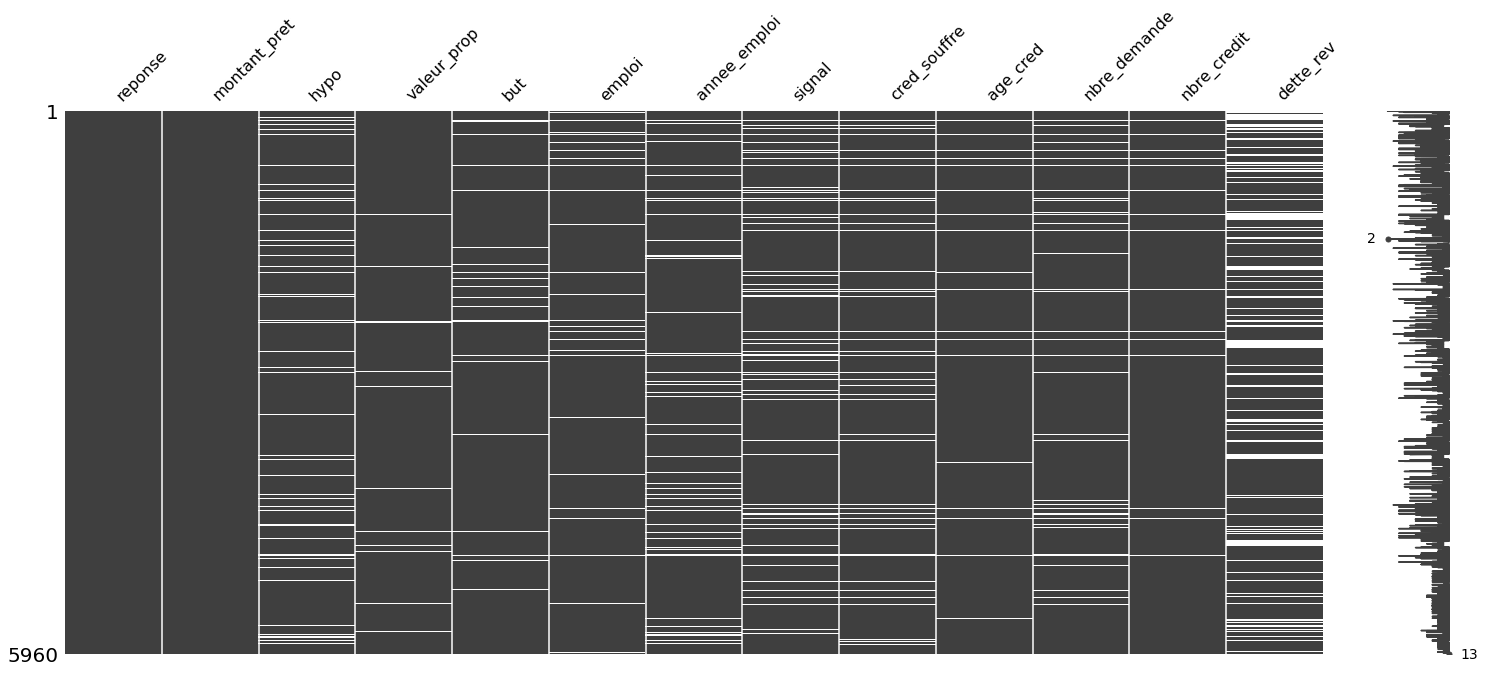

In [11]:
plt.figure()
msno.matrix(hmeq)
plt.show()

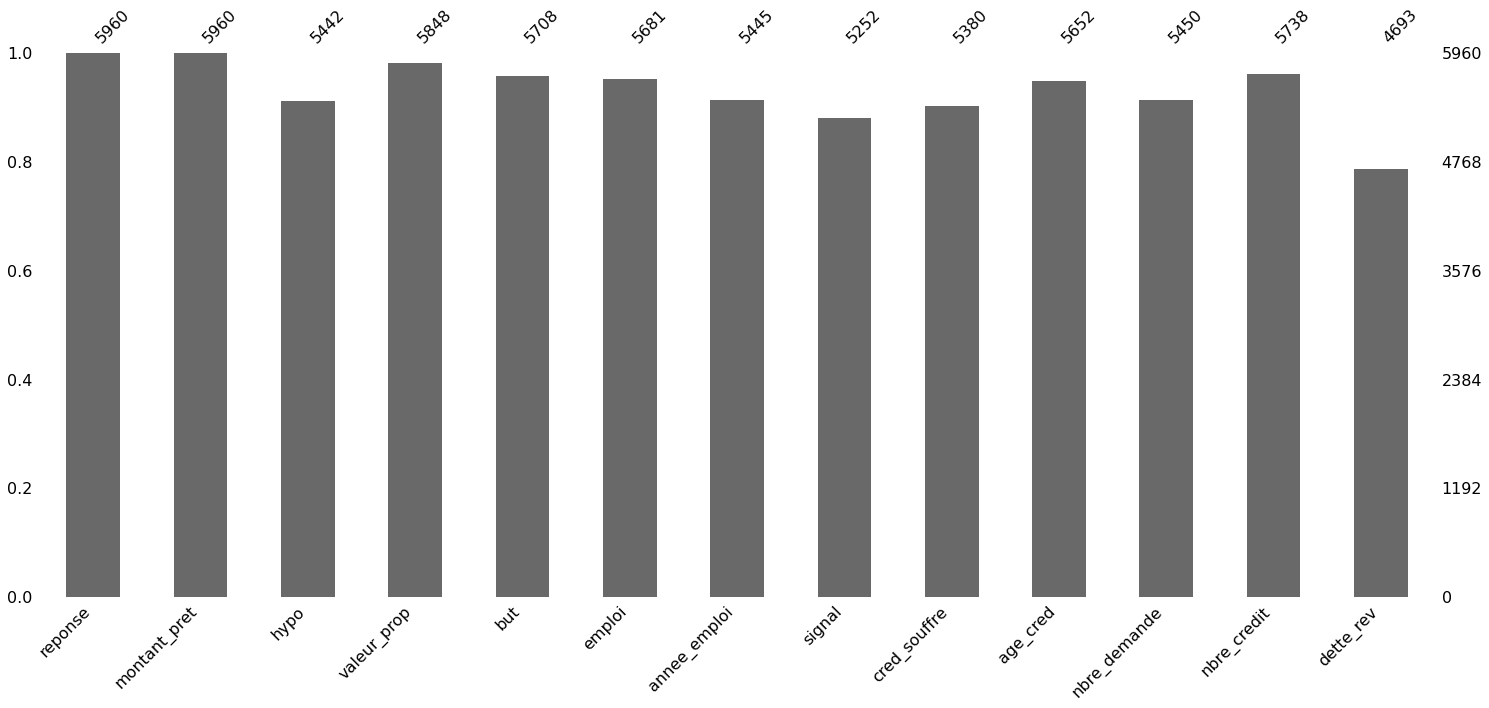

In [12]:
plt.figure()
msno.bar(hmeq)
plt.show()

### Correlation entre les données manquantes

<Figure size 432x288 with 0 Axes>

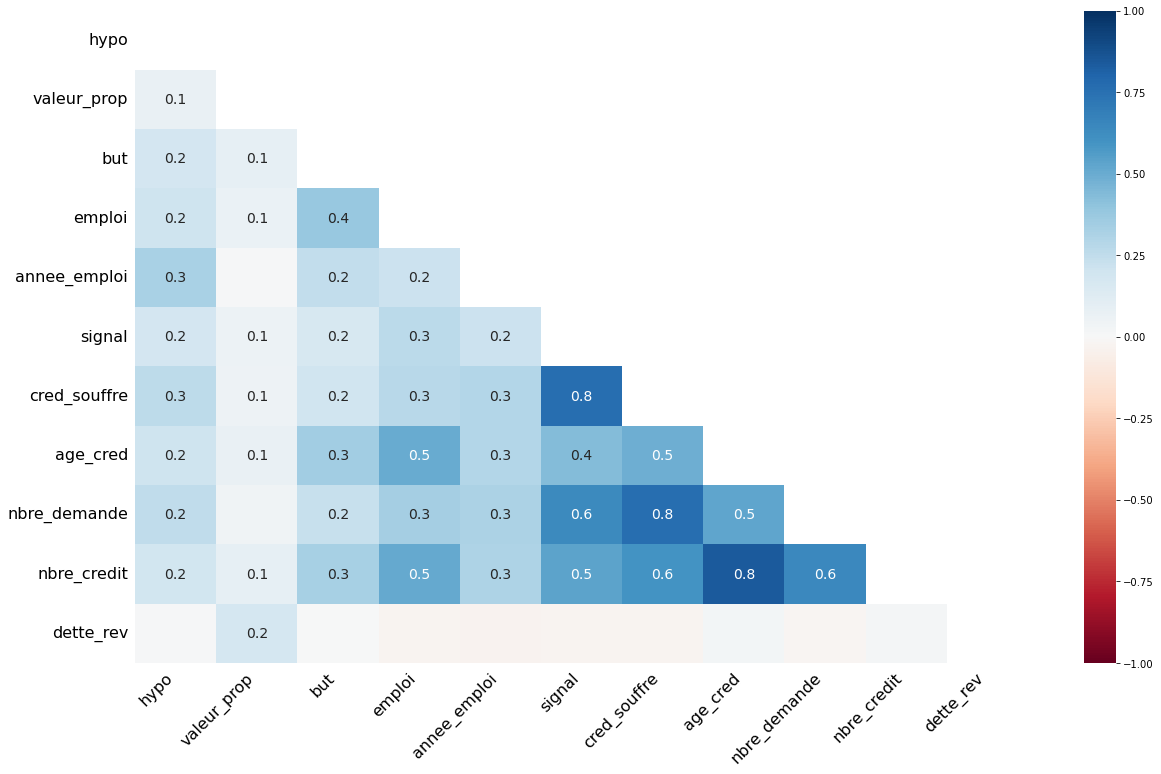

In [13]:
plt.figure()
msno.heatmap(hmeq)
plt.show()

<Figure size 432x288 with 0 Axes>

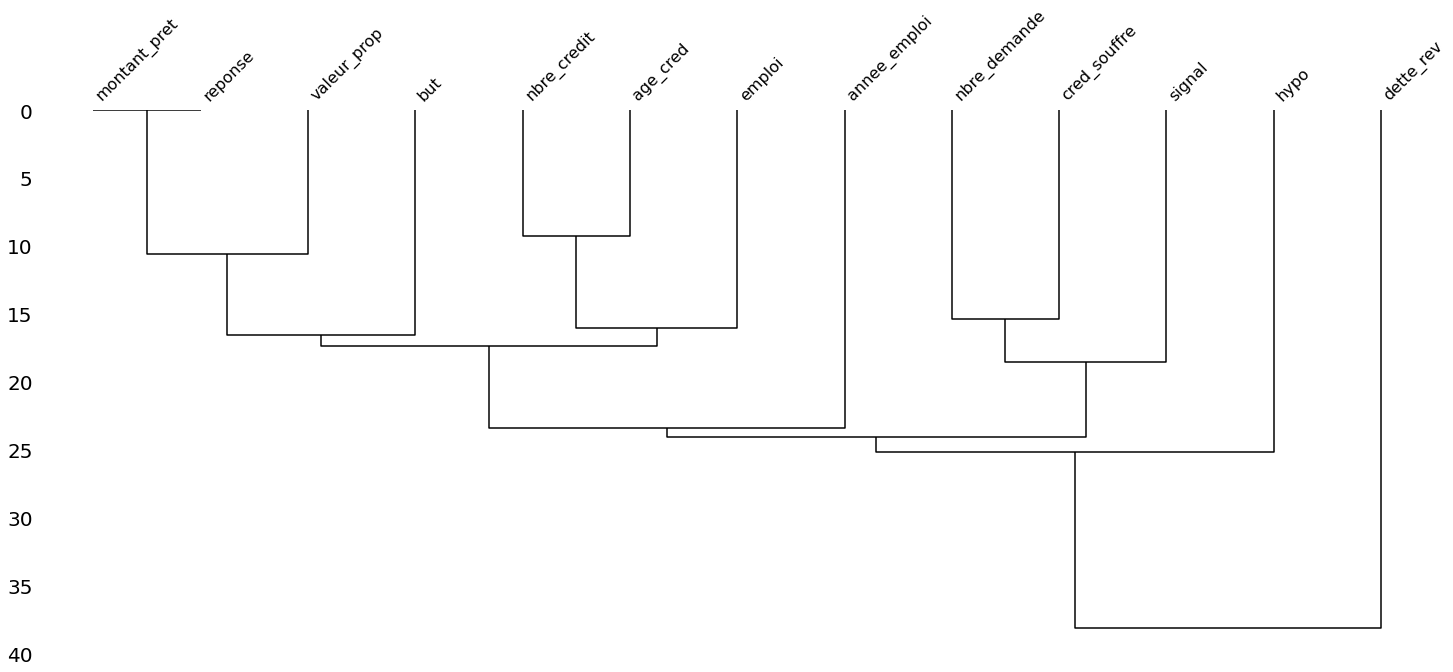

In [14]:
###Variables très corrélées
plt.figure()
msno.dendrogram(hmeq)
plt.show()

### Récuperer les variables dont les proportions de données sont au dessous de 5%

In [15]:
###Séparer les variables qualitatives et quantitatives
#var_cat=[]
#var_num=[]
###
#for var in hmeq.columns:
#    if hmeq[var].dtype=='object':
#        var_cat.append(var)
#    else:
#        var_num.append(var)

In [16]:
hmeq.shape

(5960, 13)

In [17]:
hmeq_num=hmeq.select_dtypes(include=['int','float'])
print('Les variables quantitatives sont','\n',hmeq_num.columns)
hmeq_num.shape

Les variables quantitatives sont 
 Index(['reponse', 'montant_pret', 'hypo', 'valeur_prop', 'annee_emploi',
       'signal', 'cred_souffre', 'age_cred', 'nbre_demande', 'nbre_credit',
       'dette_rev'],
      dtype='object')


(5960, 11)

In [18]:
hmeq_cat=hmeq.select_dtypes(include='object')
print('Les variables qualitatives sont','\n',hmeq_cat.columns)
hmeq_cat.shape

Les variables qualitatives sont 
 Index(['but', 'emploi'], dtype='object')


(5960, 2)

In [19]:
####Séparer les variables selon les taux de valeurs manquantes
varcat_imput=[] ###Les variables quali à imputer avec le mode
##
varnum_imput=[]  ###les variables num à imputer avec la médiance ou la moyenne
varnum_KNN=[]    ###les variables num à imputer avec KNN

var_ok=[]   ### variables sans valeurs manquantes

for var in hmeq_cat.columns:
    if (mis_prop[var]<=5) &  (mis_prop[var]>0):
        varcat_imput.append(var)
    elif (mis_prop[var]==0):
        var_ok.append(var)
for var in hmeq_num.columns:
    if (mis_prop[var]<=5) &  (mis_prop[var]>0):
        varnum_imput.append(var)
    elif (mis_prop[var]>5):
        varnum_KNN.append(var)
    elif (mis_prop[var]==0):
        var_ok.append(var)
        
print('les variables sans données manquantes','\n',var_ok)

les variables sans données manquantes 
 ['reponse', 'montant_pret']


### Définition d'une nouvelle base de données

In [20]:
hmeq_new=pd.DataFrame({})
for var in var_ok:
    hmeq_new[var]=hmeq[var]
    
hmeq_new.head(5)

,reponse,montant_pret
0,1,1100
1,1,1300
2,1,1500
3,1,1500
4,0,1700


### Imputation par la médiane

In [21]:
for var in varnum_imput:
    Med=hmeq[var].median()
    hmeq_new[var]=hmeq[var].fillna(Med)

hmeq_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reponse       5960 non-null   int64  
 1   montant_pret  5960 non-null   int64  
 2   valeur_prop   5960 non-null   float64
 3   nbre_credit   5960 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 186.4 KB


In [22]:
hmeq_new.head(5)

,reponse,montant_pret,valeur_prop,nbre_credit
0,1,1100,39025.0,9.0
1,1,1300,68400.0,14.0
2,1,1500,16700.0,10.0
3,1,1500,89235.5,20.0
4,0,1700,112000.0,14.0


### Imputation par le mode

In [23]:
from statistics import mode
for var in varcat_imput:
    Mode=mode(hmeq[var])
    hmeq_new[var]=hmeq[var].fillna(Mode)

hmeq_new.head(5)

,reponse,montant_pret,valeur_prop,nbre_credit,but,emploi
0,1,1100,39025.0,9.0,HomeImp,Other
1,1,1300,68400.0,14.0,HomeImp,Other
2,1,1500,16700.0,10.0,HomeImp,Other
3,1,1500,89235.5,20.0,DebtCon,Other
4,0,1700,112000.0,14.0,HomeImp,Office


### Imputation par la méthode $\textbf{KNN}$ ($K$ proches voisins)

les $k$ individus qui ressemblent à l'individus ayant la valeur manquante. Les valeurs utilisées seront les médianes ou les moyennes des k individus

In [24]:
from sklearn.impute import KNNImputer

In [25]:
imputer= KNNImputer(n_neighbors=3)
####
for var in varnum_KNN:
    hmeq_new[var]=imputer.fit_transform(np.array(hmeq[var]).reshape(-1, 1))


In [26]:
hmeq_new.head(5)

,reponse,montant_pret,valeur_prop,nbre_credit,but,emploi,hypo,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,dette_rev
0,1,1100,39025.0,9.0,HomeImp,Other,25860.0000,10.500000,0.00000,0.000000,94.366667,1.000000,33.779915
1,1,1300,68400.0,14.0,HomeImp,Other,70053.0000,7.000000,0.00000,2.000000,121.833333,0.000000,33.779915
2,1,1500,16700.0,10.0,HomeImp,Other,13500.0000,4.000000,0.00000,0.000000,149.466667,1.000000,33.779915
3,1,1500,89235.5,20.0,DebtCon,Other,73760.8172,8.922268,0.25457,0.449442,179.766275,1.186055,33.779915
4,0,1700,112000.0,14.0,HomeImp,Office,97800.0000,3.000000,0.00000,0.000000,93.333333,0.000000,33.779915


In [27]:
hmeq_new.shape

(5960, 13)

### Vérification

In [28]:
hmeq_new.isna().sum()

reponse         0
montant_pret    0
valeur_prop     0
nbre_credit     0
but             0
emploi          0
hypo            0
annee_emploi    0
signal          0
cred_souffre    0
age_cred        0
nbre_demande    0
dette_rev       0
dtype: int64

In [29]:
hmeq.isna().sum()

reponse            0
montant_pret       0
hypo             518
valeur_prop      112
but              252
emploi           279
annee_emploi     515
signal           708
cred_souffre     580
age_cred         308
nbre_demande     510
nbre_credit      222
dette_rev       1267
dtype: int64

### Imputation itérative par la régression linéaire

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [31]:
###Imputer par la moyenne
hmeq_iter=pd.DataFrame({})
imp_iter = IterativeImputer(max_iter=10,random_state=0,sample_posterior=True)
hmeq_iter=pd.DataFrame(imp_iter.fit_transform(hmeq[hmeq_num.columns[2:]]),\
                      columns=['hypo','valeur_prop','annee_emploi',\
                               'signal','cred_souffre','age_cred','nbre_demande','nbre_credit',\
                               'dette_rev'])

In [32]:
print(hmeq_iter.shape)
hmeq_iter.head(5)

(5960, 9)


,hypo,valeur_prop,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,nbre_credit,dette_rev
0,25860.000000,39025.000000,10.500000,0.000000,0.00000,94.366667,1.000000,9.000000,20.720087
1,70053.000000,68400.000000,7.000000,0.000000,2.00000,121.833333,0.000000,14.000000,27.266804
2,13500.000000,16700.000000,4.000000,0.000000,0.00000,149.466667,1.000000,10.000000,20.729699
3,58005.142508,53043.216813,4.208101,-0.578696,-0.06551,196.184985,-1.747602,30.038724,33.400399
4,97800.000000,112000.000000,3.000000,0.000000,0.00000,93.333333,0.000000,14.000000,30.185521


In [33]:
for var in hmeq_cat.columns:
    Mode=mode(hmeq[var])
    hmeq_iter[var]=hmeq[var].fillna(Mode)


hmeq_iter['reponse']=hmeq['reponse']    
print(hmeq_iter.shape)
hmeq_iter.head(5)

(5960, 12)


,hypo,valeur_prop,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,nbre_credit,dette_rev,but,emploi,reponse
0,25860.000000,39025.000000,10.500000,0.000000,0.00000,94.366667,1.000000,9.000000,20.720087,HomeImp,Other,1
1,70053.000000,68400.000000,7.000000,0.000000,2.00000,121.833333,0.000000,14.000000,27.266804,HomeImp,Other,1
2,13500.000000,16700.000000,4.000000,0.000000,0.00000,149.466667,1.000000,10.000000,20.729699,HomeImp,Other,1
3,58005.142508,53043.216813,4.208101,-0.578696,-0.06551,196.184985,-1.747602,30.038724,33.400399,DebtCon,Other,1
4,97800.000000,112000.000000,3.000000,0.000000,0.00000,93.333333,0.000000,14.000000,30.185521,HomeImp,Office,0


In [34]:
### Analyse descriptive des deux nouvelles bases de données
hmeq_new.describe()

,reponse,montant_pret,valeur_prop,nbre_credit,hypo,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,dette_rev
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,101540.387423,21.247819,73760.817200,8.922268,0.254570,0.449442,179.766275,1.186055,33.779915
std,0.399656,11207.480417,56869.436682,9.951308,42481.395689,7.239301,0.794198,1.071002,83.563059,1.653046,7.632713
min,0.000000,1100.000000,8000.000000,0.000000,2063.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,66489.500000,15.000000,48139.000000,3.000000,0.000000,0.000000,117.371430,0.000000,30.763159
50%,0.000000,16300.000000,89235.500000,20.000000,69529.000000,8.000000,0.000000,0.000000,178.076005,1.000000,33.779915
75%,0.000000,23300.000000,119004.750000,26.000000,88200.250000,12.000000,0.000000,0.449442,227.143058,2.000000,37.949892
max,1.000000,89900.000000,855909.000000,71.000000,399550.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,203.312149


In [35]:
hmeq_iter.describe()

,hypo,valeur_prop,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,nbre_credit,dette_rev,reponse
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,70945.645607,101722.904300,8.996700,0.266135,0.450076,179.027661,1.190385,21.238032,33.803768,0.199497
std,46669.459448,57579.813461,7.560230,0.850975,1.129200,86.030736,1.736072,10.129578,8.565878,0.399656
min,-52905.843433,-14907.871130,-12.645882,-2.498807,-3.215510,-54.154305,-3.590797,-5.883548,0.524499,0.000000
25%,43446.250000,65942.500000,3.000000,0.000000,0.000000,114.666667,0.000000,14.000000,28.833834,0.000000
50%,62798.500000,89183.000000,7.000000,0.000000,0.000000,172.832608,1.000000,20.000000,34.628590,0.000000
75%,89150.750000,120016.500000,13.000000,0.000000,0.469327,230.856686,2.000000,26.000000,39.082044,0.000000
max,616405.839440,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,1.000000


# Détection des doublons

In [36]:
###Existence de doublons
hmeq_new[hmeq_new.duplicated()==True]


,reponse,montant_pret,valeur_prop,nbre_credit,but,emploi,hypo,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,dette_rev


In [37]:
##Nombre de doublons
len(hmeq_new)-len(hmeq_new.drop_duplicates())

0

# Données aberrantes (Outlier) 

### Représentation graphique (boxplots)

In [38]:
hnew_num=hmeq_new.select_dtypes(include=['int','float'])
hnew_num.shape

(5960, 11)

In [39]:
#for var in var_num[1:]:
#    plt.figure()
#    plt.boxplot(x=hmeq_new[var],data=hmeq_new)
#    plt.xlabel(var)
#plt.show()

<AxesSubplot:>

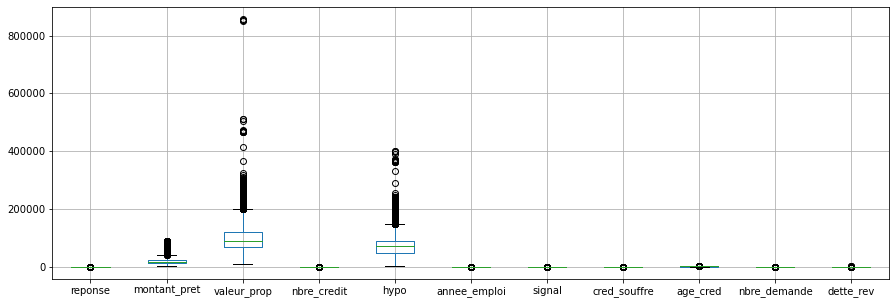

In [40]:
hnew_num.boxplot(figsize=(15,5))

<AxesSubplot:>

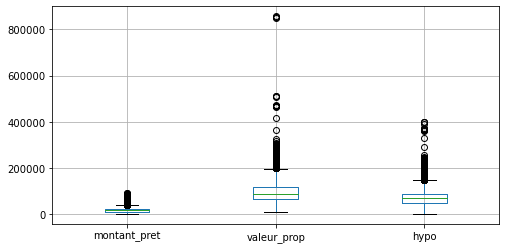

In [41]:
hnew_num[['montant_pret','valeur_prop','hypo']].boxplot(figsize=(8,4))

### Récupérer les valeurs aberrantes et les analyser

In [42]:
#var_copy=var_num.copy()
#var_copy.pop(0) 
#var_copy.pop(4) 
#var_copy.pop(4)

###
#Data_outlier=pd.DataFrame({})

#for var in var_copy:
#    Q1=hmeq_new[var].quantile(0.25)
#    Q3=hmeq_new[var].quantile(0.75)
#    IQR=Q3-Q1
#    val_inf=Q1-1.5*IQR
#    val_sup=Q3+1.5*IQR
#    VAL=hmeq_new[var]
#   print(var,': \n', VAL[(VAL<val_inf)|(VAL>val_sup)])


In [43]:
##Variables
var_interest=['montant_pret','valeur_prop','hypo']

Data_outlier=pd.DataFrame({})
###
for var in var_interest:
    Q1=hmeq_new[var].quantile(0.25)
    Q3=hmeq_new[var].quantile(0.75)
    #
    IQR=Q3-Q1
    #
    val_inf=Q1-1.5*IQR
    val_sup=Q3+1.5*IQR
    VAL=hmeq_new[var]
    ##
    print(var,': \n', VAL[(VAL<val_inf)|(VAL>val_sup)])

montant_pret : 
 5704    41700
5705    41700
5706    41700
5707    41700
5708    41800
        ...  
5955    88900
5956    89000
5957    89200
5958    89800
5959    89900
Name: montant_pret, Length: 256, dtype: int64
valeur_prop : 
 140     245300.0
194     251962.0
291     250155.0
326     200000.0
345     245730.0
          ...   
5927    288512.0
5928    292380.0
5929    289430.0
5933    215000.0
5934    224630.0
Name: valeur_prop, Length: 347, dtype: float64
hypo : 
 140     170986.0
194     179725.0
291     172595.0
326     179397.0
345     171582.0
          ...   
5925    191972.0
5926    197761.0
5927    196690.0
5928    192044.0
5929    196601.0
Name: hypo, Length: 308, dtype: float64


# Répartition des deux classes (probabilité à priori)

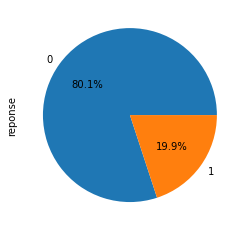

In [44]:
hmeq_new['reponse'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

# Corrélation entre les variables quantitatives

### Matrice de corrélation

In [45]:
import seaborn as sns

               reponse  montant_pret      hypo  valeur_prop  annee_emploi  \
reponse       1.000000     -0.075099 -0.048219    -0.029954     -0.060238   
montant_pret -0.075099      1.000000  0.228595     0.335393      0.105728   
hypo         -0.048219      0.228595  1.000000     0.875666     -0.088480   
valeur_prop  -0.029954      0.335393  0.875666     1.000000      0.007759   
annee_emploi -0.060238      0.105728 -0.088480     0.007759      1.000000   
signal        0.276081     -0.001302 -0.049516    -0.048689     -0.065879   
cred_souffre  0.354107     -0.035144 -0.001044    -0.014103      0.038153   
age_cred     -0.170499      0.088540  0.140047     0.171238      0.201718   
nbre_demande  0.174980      0.044487  0.031392    -0.004398     -0.071627   
nbre_credit  -0.004157      0.072631  0.323631     0.269149      0.024838   
dette_rev     0.199835      0.084735  0.154939     0.132174     -0.055891   

                signal  cred_souffre  age_cred  nbre_demande  nbre_credit  

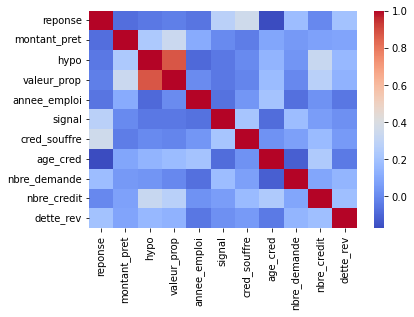

In [46]:
###
Mat_corr=hmeq_num.corr()
print(Mat_corr)

plt.figure()
sns.heatmap(Mat_corr, cmap = 'coolwarm')
plt.show()

# Multicolinéarité entre les variables 

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [48]:
help(variance_inflation_factor)

Help on function variance_inflation_factor in module statsmodels.stats.outliers_influence:

variance_inflation_factor(exog, exog_idx)
    Variance inflation factor, VIF, for one exogenous variable
    
    The variance inflation factor is a measure for the increase of the
    variance of the parameter estimates if an additional variable, given by
    exog_idx is added to the linear regression. It is a measure for
    multicollinearity of the design matrix, exog.
    
    One recommendation is that if VIF is greater than 5, then the explanatory
    variable given by exog_idx is highly collinear with the other explanatory
    variables, and the parameter estimates will have large standard errors
    because of this.
    
    Parameters
    ----------
    exog : {ndarray, DataFrame}
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    
    Returns
    -------
  

In [49]:
tab_vif=[]
    
for i in range(len(hmeq_num.columns[1:])):
    tab_vif.append(variance_inflation_factor(hmeq_new[hmeq_num.columns[1:]],i))

tab_res=pd.DataFrame({
    'variable': hmeq_num.columns[1:],
    'vif' : tab_vif
})
tab_res

,variable,vif
0,montant_pret,4.220863
1,hypo,10.765332
2,valeur_prop,11.694080
3,annee_emploi,2.616574
4,signal,1.174773
5,cred_souffre,1.255078
6,age_cred,5.749848
7,nbre_demande,1.601614
8,nbre_credit,6.696821
9,dette_rev,9.118155


# Analyse des variables qualificatives

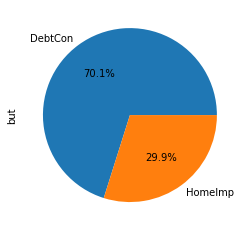

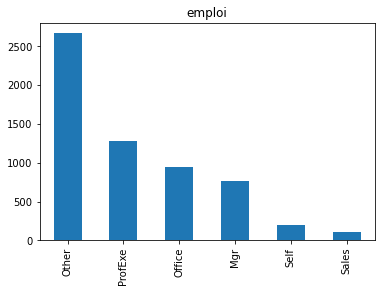

In [50]:
for var in hmeq_cat:
    if len(hmeq_new[var].unique())<=5:
        hmeq_new[var].value_counts().plot(kind='pie',autopct='%1.1f%%')
        plt.show()
    else :
        hmeq_new[var].value_counts().plot(kind='bar')
        plt.title(var)
        plt.show()

### Indépendance (Diagrammes en baton des deux classes)

but      DebtCon  HomeImp
reponse                  
0           3387     1384
1            793      396


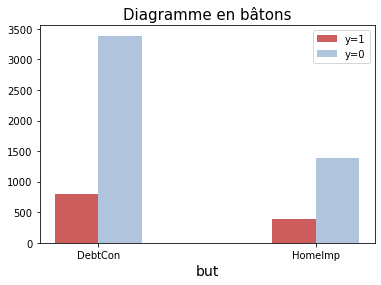

emploi   Mgr  Office  Other  ProfExe  Sales  Self
reponse                                          
0        588     823   2090     1064     71   135
1        179     125    577      212     38    58


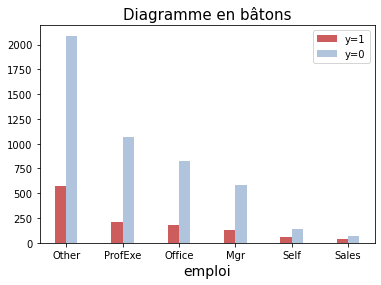

In [51]:
###
G = hmeq_new.groupby('reponse')
for var in hmeq_cat.columns:
    y0 = G.get_group(0)[var].value_counts()
    y1 = G.get_group(1)[var].value_counts()
    
    ###
    xx = hmeq_new[var].value_counts().index
    nx = np.arange(len(xx))
    h = 0.2
    
    print(pd.crosstab(hmeq_new['reponse'],hmeq_new[var]))
    plt.bar(nx-h/2, y1, h, color='IndianRed',label='y=1')
    plt.bar(nx+h/2, y0, h, color='lightsteelblue',label='y=0')
    plt.xticks(nx, xx)
    plt.xlabel(var, fontsize=14)
    plt.title('Diagramme en bâtons',fontsize=15)
    plt.legend()
    plt.show()

### Tests statistiques

In [52]:
from scipy import stats
from scipy.stats import chi2_contingency

In [53]:
help(chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [54]:
##
nom_var=[]
stat_chi2=[]
pval=[]
cramer_v=[]

for var in hmeq_cat.columns:
    ##Tableau de contingence
    tab_contingence=pd.crosstab(hmeq_new['reponse'],hmeq_new[var])
    
    ##Calculer les statistiques de chi2 et les p-valeurs des tests
    chi2, pv, dll,  freq=chi2_contingency(tab_contingence)
    
    ###
    nom_var.append(var)
    stat_chi2.append(chi2)
    pval.append(pv)
    
    ##Calculer le coefficient v de Crammer
    n=tab_contingence.sum().sum()
    phi2=chi2/n
    r,k=tab_contingence.shape
    phi2corr=max(0,phi2-((k-1)*(r-1))/(n-1))
    R=r-((r-1)**2)/(n-1)
    K=k-((k-1)**2)/(n-1)
    cramer_v.append(np.sqrt(phi2corr/min(R-1,K-1)))

res_chi2=pd.DataFrame({
    'Variable': nom_var,
    'stat_chi2' : stat_chi2,
    'p-valeur' : pval,
    'Coef Cramer' : cramer_v
})

res_chi2.sort_values(by='Coef Cramer',inplace=True, ascending=False)
res_chi2


,Variable,stat_chi2,p-valeur,Coef Cramer
1,emploi,73.815093,1.643694e-14,0.107461
0,but,8.185164,4.223437e-03,0.034724


# Variables quantitatives

In [55]:
var_copy=hmeq_num.columns[1:]
var_copy.shape

(10,)

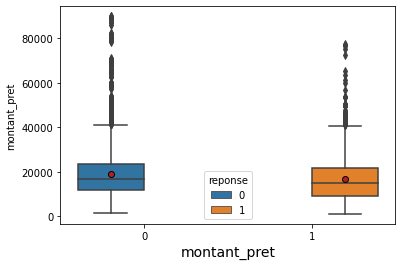

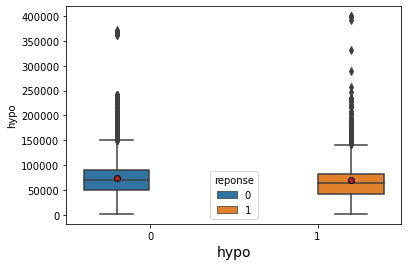

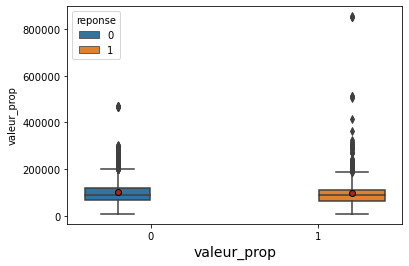

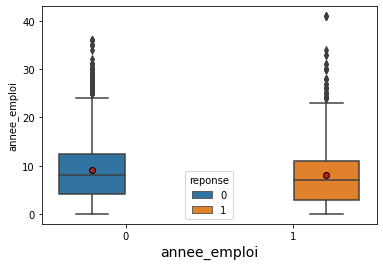

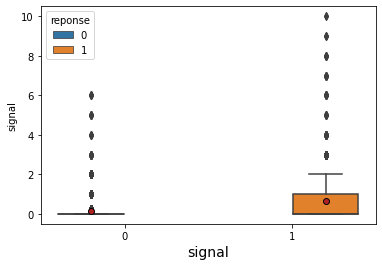

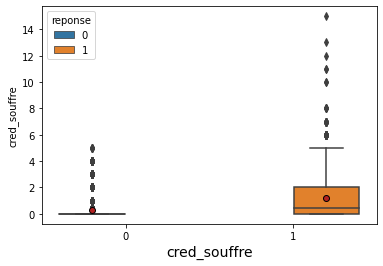

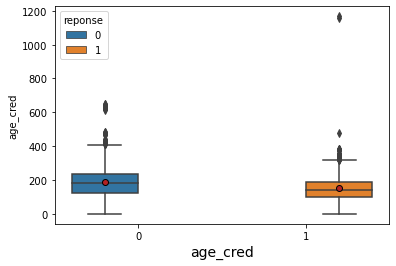

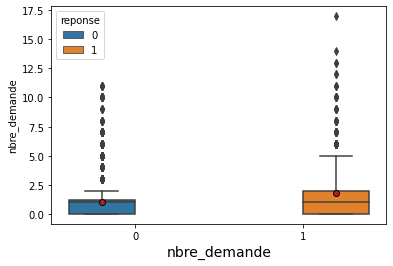

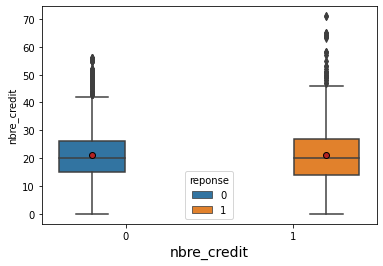

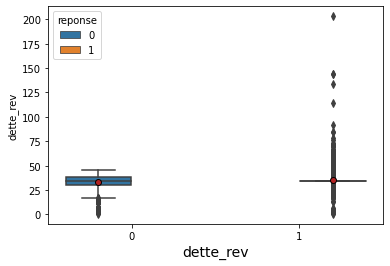

In [56]:
for var in var_copy:
    meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
    sns.boxplot(x='reponse',y=var,data=hmeq_new,showmeans=True, meanprops=meanprops,hue="reponse")
    plt.xlabel(var, fontsize=14)
    plt.show()

### Analyse descriptive

In [57]:
y0= hmeq_new[hmeq_new['reponse']==0]
y1= hmeq_new[hmeq_new['reponse']==1]

Classe 0

In [58]:
y0[hmeq_num.columns[1:]].describe()

,montant_pret,hypo,valeur_prop,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,nbre_credit,dette_rev
count,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000,4771.000000
mean,19028.107315,74736.984556,102576.318640,9.132995,0.149882,0.266887,186.653519,1.046727,21.270384,33.306238
std,11115.758554,41661.286856,52712.155613,7.305305,0.481539,0.640326,82.418266,1.460496,9.512644,6.589798
min,1700.000000,2619.000000,8000.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.720295
25%,11700.000000,49289.500000,67353.500000,4.000000,0.000000,0.000000,122.375655,0.000000,15.000000,29.580225
50%,16900.000000,71060.000000,90599.000000,8.000000,0.000000,0.000000,179.766275,1.000000,20.000000,33.779915
75%,23500.000000,89520.000000,120492.000000,12.300000,0.000000,0.000000,237.140339,1.186055,26.000000,38.326359
max,89900.000000,371003.000000,471827.000000,36.000000,6.000000,5.000000,649.747104,11.000000,56.000000,45.569843


Classe 1

In [59]:
y1[hmeq_num.columns[1:]].describe()

,montant_pret,hypo,valeur_prop,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,nbre_credit,dette_rev
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,16922.119428,69843.832795,97383.593616,8.076701,0.674641,1.181968,152.130415,1.745125,21.157275,35.680601
std,11418.455152,45432.099946,71023.941521,6.906745,1.418515,1.853755,82.442221,2.179729,11.549177,10.646448
min,1100.000000,2063.000000,8800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,9200.000000,42077.000000,61917.000000,2.900000,0.000000,0.000000,98.808206,0.000000,14.000000,33.779915
50%,14900.000000,63800.000000,86400.000000,7.000000,0.000000,0.449442,138.166667,1.000000,20.000000,33.779915
75%,21700.000000,82054.000000,112000.000000,11.000000,1.000000,2.000000,187.266667,2.000000,27.000000,33.779915
max,77400.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


### Test de Kruskal-Wallis

In [60]:
help(stats.kruskal)

Help on function kruskal in module scipy.stats.stats:

kruskal(*args, nan_policy='propagate')
    Compute the Kruskal-Wallis H-test for independent samples.
    
    The Kruskal-Wallis H-test tests the null hypothesis that the population
    median of all of the groups are equal.  It is a non-parametric version of
    ANOVA.  The test works on 2 or more independent samples, which may have
    different sizes.  Note that rejecting the null hypothesis does not
    indicate which of the groups differs.  Post hoc comparisons between
    groups are required to determine which groups are different.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
       Two or more arrays with the sample measurements can be given as
       arguments. Samples must be one-dimensional.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'pro

In [61]:
##Initialisation des variables
Nom_var=[]
stat_kw=[]
p_val=[]

for var in var_copy:
    kstat, pv = stats.kruskal(y0[var], y1[var])

    ###
    Nom_var.append(var)
    stat_kw.append(kstat)
    p_val.append(pv)


res_kw=pd.DataFrame({
    'variable' : Nom_var,
    'statistique' : stat_kw,
    'p_valeur':p_val
})

res_kw

,variable,statistique,p_valeur
0,montant_pret,70.019901,5.870916e-17
1,hypo,31.493754,2.000828e-08
2,valeur_prop,32.763972,1.040557e-08
3,annee_emploi,19.496234,1.007982e-05
4,signal,193.918109,4.437487e-44
5,cred_souffre,452.129309,2.481541e-100
6,age_cred,192.060415,1.128754e-43
7,nbre_demande,109.939452,1.010300e-25
8,nbre_credit,1.195847,2.741532e-01
9,dette_rev,8.799980,3.012339e-03


### Test d'ANOVA

In [62]:
from scipy.stats import f_oneway

In [63]:
help(f_oneway)

Help on function f_oneway in module scipy.stats.stats:

f_oneway(*args, axis=0)
    Perform one-way ANOVA.
    
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int, optional
        Axis of the input arrays along which the test is applied.
        Default is 0.
    
    Returns
    -------
    statistic : float
        The computed F statistic of the test.
    pvalue : float
        The associated p-value from the F distribution.
    
    Warns
    -----
    F_onewayConstantInputWarning
        Raised if each of the input arrays is constant arra

In [64]:
####
stat_val, pval=f_oneway(y0[var_copy],y1[var_copy])

res_anova=pd.DataFrame({'variable':var_copy,
                       'stat':stat_val,
                       'p_value' :pval})
res_anova

,variable,stat,p_value
0,montant_pret,33.792800,6.448273e-09
1,hypo,12.652409,3.779976e-04
2,valeur_prop,7.944813,4.838447e-03
3,annee_emploi,20.329566,6.643425e-06
4,signal,446.606907,1.188443e-95
5,cred_souffre,786.419992,1.199135e-162
6,age_cred,166.981128,1.079815e-37
7,nbre_demande,174.852019,2.302823e-39
8,nbre_credit,0.122945,7.258743e-01
9,dette_rev,93.534858,5.784140e-22


# Normalité des variables

### Skewness et Kurtosis

In [65]:
from scipy.stats import skew, kurtosis

Classe 0

In [66]:
###
sym=[]
applat=[]
VAR=[]
###
for var in hmeq_num.columns[1:]:
    VAR.append(var)
    sym.append(skew(y0[var]))
    applat.append(kurtosis(y0[var]))

    
y0_norm=pd.DataFrame({
    'Variable':VAR,
    'symétrie':sym,
    'applatissement' : applat
})

y0_norm

,Variable,symétrie,applatissement
0,montant_pret,2.148768,7.792859
1,hypo,1.763267,6.268184
2,valeur_prop,1.768143,5.510114
3,annee_emploi,0.991560,0.496857
4,signal,5.993423,49.361378
5,cred_souffre,3.525376,14.902346
6,age_cred,0.935877,2.462848
7,nbre_demande,2.773101,11.431806
8,nbre_credit,0.774890,1.031151
9,dette_rev,-0.964605,1.316854


Classe 1 

In [67]:
###
sym=[]
applat=[]
VAR=[]
###
for var in hmeq_num.columns[1:]:
    VAR.append(var)
    sym.append(skew(y1[var]))
    applat.append(kurtosis(y1[var]))

    
y1_norm=pd.DataFrame({
    'Variable':VAR,
    'symétrie':sym,
    'applatissement' : applat
})

y1_norm

,Variable,symétrie,applatissement
0,montant_pret,1.663643,3.944150
1,hypo,2.368014,10.778869
2,valeur_prop,5.134644,45.129284
3,annee_emploi,1.218924,1.673855
4,signal,3.237705,12.394274
5,cred_souffre,2.410436,7.847979
6,age_cred,3.486034,36.815012
7,nbre_demande,2.208870,6.656958
8,nbre_credit,0.847420,1.528802
9,dette_rev,6.524384,79.426936


### Histogramme

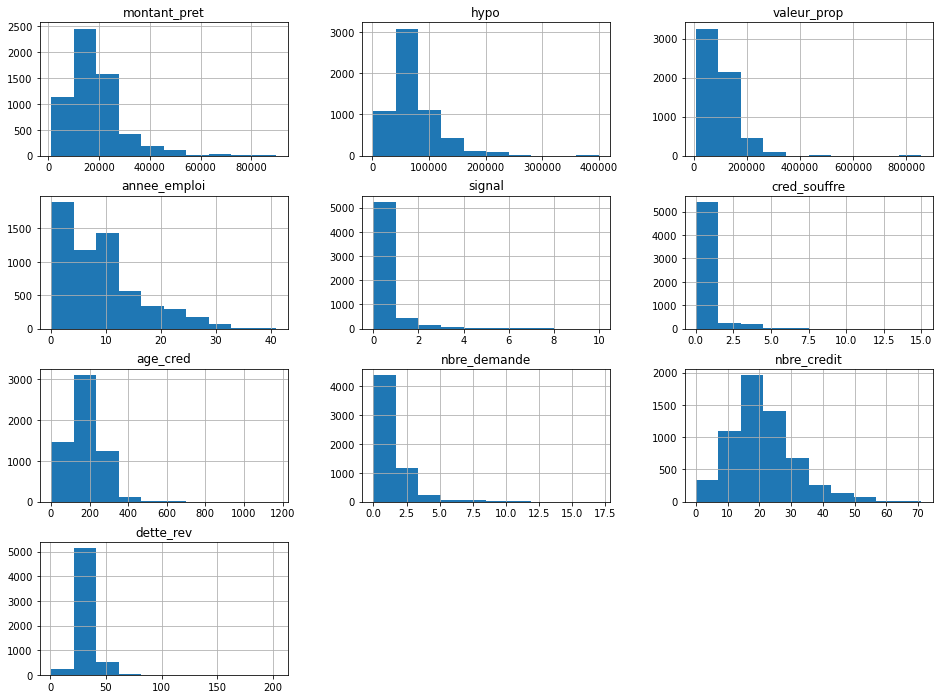

In [68]:
_=hmeq_new[hmeq_num.columns[1:]].hist(figsize=(16,12))

### Test de Shapiro

Classe 0

In [69]:
###
stat0=[]
pv0=[]

for var in hmeq_num.columns[1:]:
    N_stat=stats.shapiro(y0[var])
    stat0.append(N_stat.statistic)
    pv0.append(N_stat.pvalue)

y0_shapiro=pd.DataFrame({
    'variables': hmeq_num.columns[1:],
    'statistic':stat0,
    'p-value':pv0
})
y0_shapiro

,variables,statistic,p-value
0,montant_pret,0.839861,0.000000e+00
1,hypo,0.882699,0.000000e+00
2,valeur_prop,0.871156,0.000000e+00
3,annee_emploi,0.913049,0.000000e+00
4,signal,0.339266,0.000000e+00
5,cred_souffre,0.477061,0.000000e+00
6,age_cred,0.954426,3.337076e-36
7,nbre_demande,0.691129,0.000000e+00
8,nbre_credit,0.963477,4.187294e-33
9,dette_rev,0.944938,5.777524e-39


Classe 1

In [70]:
###
stat1=[]
pv1=[]

for var in hmeq_num.columns[1:]:
    N_stat=stats.shapiro(y1[var])
    stat1.append(N_stat.statistic)
    pv1.append(N_stat.pvalue)

y1_shapiro=pd.DataFrame({
    'variables': hmeq_num.columns[1:],
    'statistic':stat1,
    'p-value':pv1
})
y1_shapiro

,variables,statistic,p-value
0,montant_pret,0.870638,2.947418e-30
1,hypo,0.831010,1.142985e-33
2,valeur_prop,0.646421,4.344025e-44
3,annee_emploi,0.898133,2.279235e-27
4,signal,0.538666,0.000000e+00
5,cred_souffre,0.681448,1.579263e-42
6,age_cred,0.827312,5.932976e-34
7,nbre_demande,0.755597,1.078126e-38
8,nbre_credit,0.959383,1.114468e-17
9,dette_rev,0.448242,0.000000e+00


# Résumé 

1) Les variables fortement corrélées sont '$\textbf{la valeur de la propriété}$' et '$\textbf{hypo}$'.

2) Les médianes sont différentes dans les deux classes (test de Kruskal-Wallis) pour toutes les variables quantitatives sauf la variable '$\textbf{nombre de crédit}$'.

3) Les moyennes des deux classes sont différentes (ANOVA) par variables quantitatives sauf la variable '$\textbf{nombre de crédit}$'.

4) Les deux variables qualitatives sont dépendantes des classes.

5) Les variables quantitatives dans les deux classes ne suivent pas des lois gaussiennes.

# Conversion des variables catégorielles en variables indicatrices

In [71]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
  

In [72]:
hmeq_NEW=pd.get_dummies(hmeq_new,columns=['but','emploi'],drop_first=True)
hmeq_NEW

,reponse,montant_pret,valeur_prop,nbre_credit,hypo,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,dette_rev,but_HomeImp,emploi_Office,emploi_Other,emploi_ProfExe,emploi_Sales,emploi_Self
0,1,1100,39025.0,9.0,25860.0000,10.500000,0.00000,0.000000,94.366667,1.000000,33.779915,1,0,1,0,0,0
1,1,1300,68400.0,14.0,70053.0000,7.000000,0.00000,2.000000,121.833333,0.000000,33.779915,1,0,1,0,0,0
2,1,1500,16700.0,10.0,13500.0000,4.000000,0.00000,0.000000,149.466667,1.000000,33.779915,1,0,1,0,0,0
3,1,1500,89235.5,20.0,73760.8172,8.922268,0.25457,0.449442,179.766275,1.186055,33.779915,0,0,1,0,0,0
4,0,1700,112000.0,14.0,97800.0000,3.000000,0.00000,0.000000,93.333333,0.000000,33.779915,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,90185.0,16.0,57264.0000,16.000000,0.00000,0.000000,221.808718,0.000000,36.112347,0,0,1,0,0,0
5956,0,89000,92937.0,15.0,54576.0000,16.000000,0.00000,0.000000,208.692070,0.000000,35.859971,0,0,1,0,0,0
5957,0,89200,92924.0,15.0,54045.0000,15.000000,0.00000,0.000000,212.279697,0.000000,35.556590,0,0,1,0,0,0
5958,0,89800,91861.0,16.0,50370.0000,14.000000,0.00000,0.000000,213.892709,0.000000,34.340882,0,0,1,0,0,0


# Choix de modèle

In [73]:
X_gene=hmeq_NEW[hmeq_NEW.columns[1:]]  ###Toutes les variables explicatives
##Enlever la valeur_prop
X1=hmeq_NEW[['montant_pret', 'nbre_credit', 'hypo', 'annee_emploi',
       'signal', 'cred_souffre', 'age_cred', 'nbre_demande', 'dette_rev',
       'but_HomeImp', 'emploi_Office', 'emploi_Other', 'emploi_ProfExe',
       'emploi_Sales', 'emploi_Self']]
###Enlever hypo
X2=hmeq_NEW[['montant_pret', 'valeur_prop', 'nbre_credit', 'annee_emploi',
       'signal', 'cred_souffre', 'age_cred', 'nbre_demande', 'dette_rev',
       'but_HomeImp', 'emploi_Office', 'emploi_Other', 'emploi_ProfExe',
       'emploi_Sales', 'emploi_Self']]
##Enlever le nombre de crédit
X3=hmeq_NEW[['montant_pret', 'valeur_prop', 'hypo', 'annee_emploi',
       'signal', 'cred_souffre', 'age_cred', 'nbre_demande', 'dette_rev',
       'but_HomeImp', 'emploi_Office', 'emploi_Other', 'emploi_ProfExe',
       'emploi_Sales', 'emploi_Self']]
y=hmeq_NEW['reponse']
y

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: reponse, Length: 5960, dtype: int64

In [74]:
import statsmodels.api as sm

Modèle 1

In [75]:
X_gene=sm.add_constant(X_gene)
model1=sm.Logit(y,X_gene)
res1=model1.fit()
res1.summary()

Optimization terminated successfully.
         Current function value: 0.392966
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                reponse   No. Observations:                 5960
Model:                          Logit   Df Residuals:                     5943
Method:                           MLE   Df Model:                           16
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                  0.2136
Time:                        11:17:54   Log-Likelihood:                -2342.1
converged:                       True   LL-Null:                       -2978.2
Covariance Type:            nonrobust   LLR p-value:                4.435e-261
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4294      0.261     -9.293      0.000      -2.942      -1.917
montant_pret   -1.935e-05   4.08e-06     -4.741      0.000   -2.73e-05   -1.14e-05
valeur_prop     3.398e-06   9.89e-07      3.435      0.001    1.46e-06    5.34e-06
nbre_credit       -0.0134      0.004     -3.112      0.002      -0.022      -0.005
hypo           -4.355e-06    1.4e-06     -3.109      0.002    -7.1e-06   -1.61e-06
annee_emploi      -0.0106      0.006     -1.829      0.067      -0.022       0.001
signal             0.5510      0.049     11.348      0.000       0.456       0.646
cred_souffre       0.7582      0.038     19.696      0.000       0.683       0.834
age_cred          -0.0056      0.001    -10.296      0.000      -0.007      -0.005
nbre_demande       0.1672      0.021      8.123      0.000       0.127       0.208
dette_rev          0.0519      0.006      8.572      0.000       0.040       0.064
but_HomeImp        0.2679      0.084      3.195      0.001       0.104       0.432
emploi_Office     -0.6007      0.150     -4.005      0.000      -0.895      -0.307
emploi_Other       0.0302      0.115      0.262      0.793      -0.196       0.256
emploi_ProfExe     0.0168      0.134      0.125      0.900      -0.246       0.279
emploi_Sales       0.9906      0.260      3.814      0.000       0.482       1.500
emploi_Self        0.5847      0.215      2.719      0.007       0.163       1.006
==================================================================================
"""

In [76]:
X1=sm.add_constant(X1)
model2=sm.Logit(y,X1)
res2=model2.fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.393922
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                reponse   No. Observations:                 5960
Model:                          Logit   Df Residuals:                     5944
Method:                           MLE   Df Model:                           15
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                  0.2117
Time:                        11:17:54   Log-Likelihood:                -2347.8
converged:                       True   LL-Null:                       -2978.2
Covariance Type:            nonrobust   LLR p-value:                1.334e-259
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4362      0.262     -9.297      0.000      -2.950      -1.923
montant_pret   -1.612e-05   3.93e-06     -4.106      0.000   -2.38e-05   -8.43e-06
nbre_credit       -0.0130      0.004     -3.032      0.002      -0.021      -0.005
hypo           -1.255e-06   1.06e-06     -1.189      0.234   -3.32e-06    8.13e-07
annee_emploi      -0.0090      0.006     -1.569      0.117      -0.020       0.002
signal             0.5435      0.048     11.241      0.000       0.449       0.638
cred_souffre       0.7530      0.038     19.677      0.000       0.678       0.828
age_cred          -0.0056      0.001    -10.145      0.000      -0.007      -0.004
nbre_demande       0.1645      0.021      7.998      0.000       0.124       0.205
dette_rev          0.0525      0.006      8.685      0.000       0.041       0.064
but_HomeImp        0.2887      0.083      3.458      0.001       0.125       0.452
emploi_Office     -0.5934      0.150     -3.965      0.000      -0.887      -0.300
emploi_Other       0.0229      0.115      0.198      0.843      -0.203       0.249
emploi_ProfExe     0.0471      0.133      0.353      0.724      -0.214       0.308
emploi_Sales       1.0209      0.260      3.921      0.000       0.511       1.531
emploi_Self        0.6458      0.214      3.016      0.003       0.226       1.066
==================================================================================
"""

In [77]:
X2=sm.add_constant(X2)
model3=sm.Logit(y,X2)
res3=model3.fit()
res3.summary()

Optimization terminated successfully.
         Current function value: 0.393798
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                reponse   No. Observations:                 5960
Model:                          Logit   Df Residuals:                     5944
Method:                           MLE   Df Model:                           15
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                  0.2119
Time:                        11:17:54   Log-Likelihood:                -2347.0
converged:                       True   LL-Null:                       -2978.2
Covariance Type:            nonrobust   LLR p-value:                6.409e-260
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5075      0.260     -9.644      0.000      -3.017      -1.998
montant_pret   -1.927e-05    4.1e-06     -4.698      0.000   -2.73e-05   -1.12e-05
valeur_prop     1.324e-06   7.58e-07      1.747      0.081   -1.61e-07    2.81e-06
nbre_credit       -0.0151      0.004     -3.570      0.000      -0.023      -0.007
annee_emploi      -0.0082      0.006     -1.431      0.152      -0.019       0.003
signal             0.5522      0.049     11.384      0.000       0.457       0.647
cred_souffre       0.7570      0.038     19.736      0.000       0.682       0.832
age_cred          -0.0057      0.001    -10.399      0.000      -0.007      -0.005
nbre_demande       0.1655      0.021      8.045      0.000       0.125       0.206
dette_rev          0.0514      0.006      8.505      0.000       0.040       0.063
but_HomeImp        0.2741      0.084      3.276      0.001       0.110       0.438
emploi_Office     -0.5713      0.149     -3.827      0.000      -0.864      -0.279
emploi_Other       0.0569      0.115      0.495      0.620      -0.168       0.282
emploi_ProfExe     0.0044      0.134      0.033      0.974      -0.258       0.267
emploi_Sales       0.9890      0.261      3.787      0.000       0.477       1.501
emploi_Self        0.5983      0.215      2.784      0.005       0.177       1.020
==================================================================================
"""

In [78]:
X3=sm.add_constant(X3)
model4=sm.Logit(y,X3)
res4=model4.fit()
res4.summary()

Optimization terminated successfully.
         Current function value: 0.393789
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                reponse   No. Observations:                 5960
Model:                          Logit   Df Residuals:                     5944
Method:                           MLE   Df Model:                           15
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                  0.2120
Time:                        11:17:54   Log-Likelihood:                -2347.0
converged:                       True   LL-Null:                       -2978.2
Covariance Type:            nonrobust   LLR p-value:                6.072e-260
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5065      0.260     -9.658      0.000      -3.015      -1.998
montant_pret   -1.941e-05   4.08e-06     -4.752      0.000   -2.74e-05   -1.14e-05
valeur_prop     3.301e-06   9.83e-07      3.357      0.001    1.37e-06    5.23e-06
hypo           -4.921e-06   1.38e-06     -3.564      0.000   -7.63e-06   -2.21e-06
annee_emploi      -0.0109      0.006     -1.874      0.061      -0.022       0.000
signal             0.5411      0.048     11.182      0.000       0.446       0.636
cred_souffre       0.7364      0.037     19.684      0.000       0.663       0.810
age_cred          -0.0060      0.001    -11.190      0.000      -0.007      -0.005
nbre_demande       0.1625      0.020      7.931      0.000       0.122       0.203
dette_rev          0.0494      0.006      8.271      0.000       0.038       0.061
but_HomeImp        0.3026      0.083      3.645      0.000       0.140       0.465
emploi_Office     -0.5872      0.150     -3.922      0.000      -0.881      -0.294
emploi_Other       0.0550      0.115      0.480      0.631      -0.170       0.279
emploi_ProfExe    -0.0093      0.133     -0.069      0.945      -0.270       0.252
emploi_Sales       0.9650      0.259      3.729      0.000       0.458       1.472
emploi_Self        0.5900      0.214      2.760      0.006       0.171       1.009
==================================================================================
"""

In [79]:
tab_aic=pd.DataFrame({
    'Modèle':['Model1','Model2','Model3','Model4'],
    'AIC':[res1.aic,res2.aic,res3.aic,res4.aic],
    'BIC':[res1.bic,res2.bic,res3.bic,res4.bic]
})
tab_aic

,Modèle,AIC,BIC
0,Model1,4718.151475,4831.929513
1,Model2,4727.551241,4834.636453
2,Model3,4726.069788,4833.155000
3,Model4,4725.960683,4833.045895


### Echentillonnage de la base de données

In [80]:
from sklearn.model_selection import train_test_split

X=sm.add_constant(hmeq_NEW[hmeq_NEW.columns[1:]])
###
X_train, X_test, y_train, y_test = train_test_split(X,hmeq_NEW['reponse'], test_size=0.2, random_state=42)

In [81]:
X_train.shape

(4768, 17)

### Mesures de performance du modèle 1

In [82]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [83]:
Model1=sm.Logit(y_train,X_train)
Res1=Model1.fit()
Res1.summary()

Optimization terminated successfully.
         Current function value: 0.383680
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                reponse   No. Observations:                 4768
Model:                          Logit   Df Residuals:                     4751
Method:                           MLE   Df Model:                           16
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                  0.2196
Time:                        11:17:54   Log-Likelihood:                -1829.4
converged:                       True   LL-Null:                       -2344.3
Covariance Type:            nonrobust   LLR p-value:                4.570e-209
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.5552      0.293     -8.716      0.000      -3.130      -1.981
montant_pret   -1.853e-05   4.65e-06     -3.985      0.000   -2.77e-05   -9.42e-06
valeur_prop     3.604e-06   1.14e-06      3.153      0.002    1.36e-06    5.84e-06
nbre_credit       -0.0162      0.005     -3.310      0.001      -0.026      -0.007
hypo           -4.109e-06   1.59e-06     -2.580      0.010   -7.23e-06   -9.87e-07
annee_emploi      -0.0164      0.007     -2.497      0.013      -0.029      -0.004
signal             0.6112      0.055     11.026      0.000       0.503       0.720
cred_souffre       0.7725      0.044     17.458      0.000       0.686       0.859
age_cred          -0.0053      0.001     -8.546      0.000      -0.006      -0.004
nbre_demande       0.1854      0.023      8.073      0.000       0.140       0.230
dette_rev          0.0501      0.007      7.403      0.000       0.037       0.063
but_HomeImp        0.3202      0.095      3.381      0.001       0.135       0.506
emploi_Office     -0.5019      0.173     -2.909      0.004      -0.840      -0.164
emploi_Other       0.1356      0.132      1.026      0.305      -0.123       0.395
emploi_ProfExe     0.0933      0.153      0.611      0.541      -0.206       0.393
emploi_Sales       1.2520      0.283      4.422      0.000       0.697       1.807
emploi_Self        0.6376      0.241      2.649      0.008       0.166       1.110
==================================================================================
"""

In [84]:
###Accuracy score
y_pred=Res1.predict(X_test)
yp=accuracy_score(y_test,list(map(round,y_pred)))
yp

0.8179530201342282

In [106]:
mes=classification_report(y_test,list(map(round,y_pred)))
print(mes)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       927
           1       0.70      0.32      0.44       265

    accuracy                           0.82      1192
   macro avg       0.77      0.64      0.66      1192
weighted avg       0.80      0.82      0.79      1192



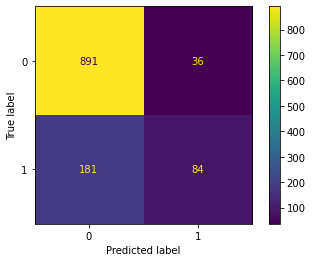

In [85]:
###Matrice de confusion
cmat=confusion_matrix(y_test, list(map(round,y_pred)))
conf = ConfusionMatrixDisplay(cmat).plot()

### Mesures de performance du modèle 4

In [86]:
Xn_train=X_train[['montant_pret', 'valeur_prop', 'hypo', 'annee_emploi',
       'signal', 'cred_souffre', 'age_cred', 'nbre_demande', 'dette_rev',
       'but_HomeImp', 'emploi_Office', 'emploi_Other', 'emploi_ProfExe',
       'emploi_Sales', 'emploi_Self']]
#
yn_train=y_train
#
Xn_test=X_test[['montant_pret', 'valeur_prop', 'hypo', 'annee_emploi',
       'signal', 'cred_souffre', 'age_cred', 'nbre_demande', 'dette_rev',
       'but_HomeImp', 'emploi_Office', 'emploi_Other', 'emploi_ProfExe',
       'emploi_Sales', 'emploi_Self']]
##
yn_test=y_test

In [87]:
yn_train.shape

(4768,)

In [88]:
Model4=sm.Logit(yn_train,Xn_train)
Res4=Model4.fit()
Res4.summary()

Optimization terminated successfully.
         Current function value: 0.394804
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                reponse   No. Observations:                 4768
Model:                          Logit   Df Residuals:                     4753
Method:                           MLE   Df Model:                           14
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                  0.1970
Time:                        11:17:55   Log-Likelihood:                -1882.4
converged:                       True   LL-Null:                       -2344.3
Covariance Type:            nonrobust   LLR p-value:                3.500e-188
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
montant_pret   -2.574e-05   4.71e-06     -5.470      0.000    -3.5e-05   -1.65e-05
valeur_prop     3.627e-06   1.12e-06      3.231      0.001    1.43e-06    5.83e-06
hypo           -7.011e-06   1.57e-06     -4.452      0.000   -1.01e-05   -3.92e-06
annee_emploi      -0.0295      0.007     -4.507      0.000      -0.042      -0.017
signal             0.5549      0.053     10.383      0.000       0.450       0.660
cred_souffre       0.7338      0.043     17.043      0.000       0.649       0.818
age_cred          -0.0071      0.001    -12.068      0.000      -0.008      -0.006
nbre_demande       0.1529      0.023      6.701      0.000       0.108       0.198
dette_rev          0.0044      0.004      1.103      0.270      -0.003       0.012
but_HomeImp        0.2180      0.092      2.370      0.018       0.038       0.398
emploi_Office     -0.9673      0.157     -6.145      0.000      -1.276      -0.659
emploi_Other      -0.3631      0.111     -3.280      0.001      -0.580      -0.146
emploi_ProfExe    -0.3959      0.136     -2.904      0.004      -0.663      -0.129
emploi_Sales       0.7185      0.273      2.633      0.008       0.184       1.253
emploi_Self        0.2869      0.234      1.228      0.219      -0.171       0.745
==================================================================================
"""

In [89]:
###Accuracy score
yn_pred=Res4.predict(Xn_test)
ynp=accuracy_score(yn_test,list(map(round,yn_pred)))
ynp

0.8062080536912751

In [107]:
mesn=classification_report(yn_test,list(map(round,yn_pred)))
print(mesn)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       927
           1       0.63      0.31      0.42       265

    accuracy                           0.81      1192
   macro avg       0.73      0.63      0.65      1192
weighted avg       0.78      0.81      0.78      1192



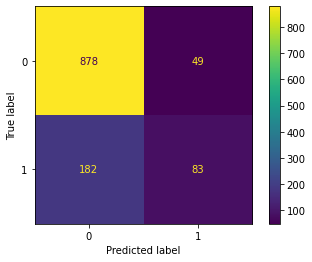

In [90]:
###Matrice de confusion
cmat4=confusion_matrix(yn_test, list(map(round,yn_pred)))
conf4 = ConfusionMatrixDisplay(cmat4).plot()

### Seuil optimal

Courbe ROC

In [92]:
from sklearn.metrics import roc_curve, auc

Model 1

In [101]:
spec_mod1, sens1, seuil1 = roc_curve(y_test,y_pred)

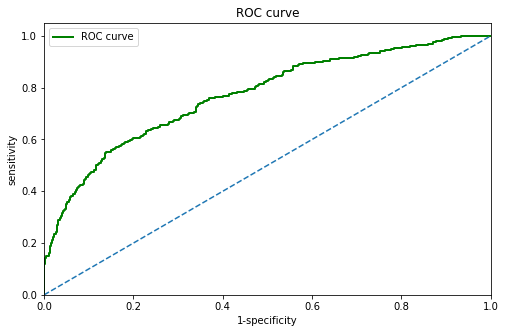

In [102]:
###Graphic representation
plt.figure(figsize=(8,5))
plt.plot(spec_mod1,sens1,color="green",lw=2,label='ROC curve')
plt.plot([0,1],[0,1],linestyle='--')
###
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("1-specificity")
plt.ylabel("sensitivity")
plt.title("ROC curve")
plt.legend()

In [103]:
###Seuil optimal
###Approche basée sur la courbe ROC
thres=seuil1[np.argmax(sens1-spec_mod1)]
thres

0.2560603245379334

In [110]:
Y_pred=Res1.predict(X_test)>thres
Yp=accuracy_score(y_test,list(map(round,Y_pred)))
Yp

0.7911073825503355

In [113]:
###Equilibre Précision-Recall
from sklearn.metrics import precision_recall_curve
prec1, rec1, seuil11=precision_recall_curve(y_test,y_pred)
thres1=seuil11[np.argmax(prec1+rec1)]
thres

0.2560603245379334